c:\Users\romeo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Accuratezza finale del modello: 0.98
Loss finale: 0.05


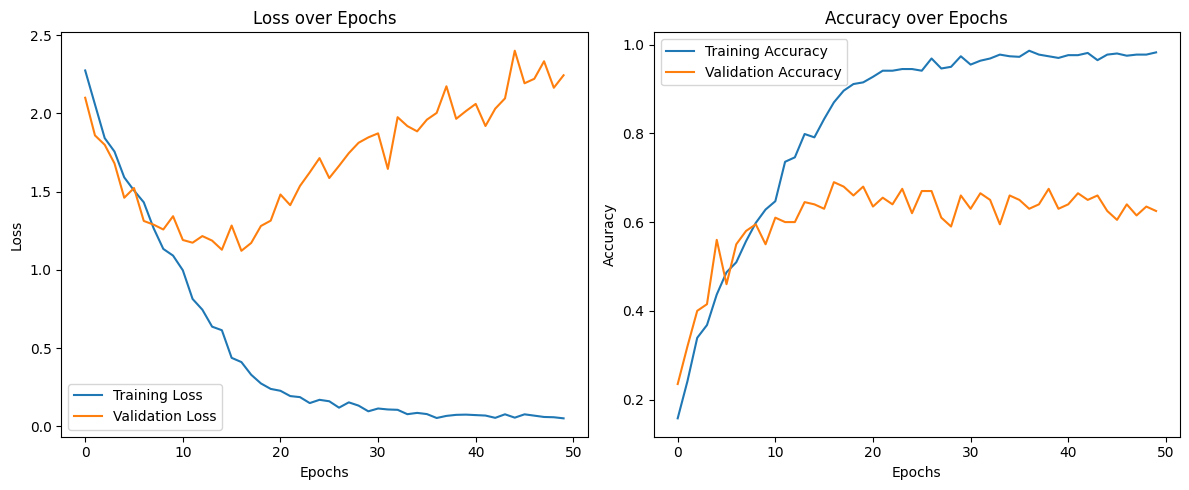

7/7 - 2s - 321ms/step - accuracy: 0.1100 - loss: 2.3037
Test Loss: 2.3036820888519287
Test Accuracy: 0.10999999940395355


In [10]:
import os
import numpy as np
import cv2  # Assicurati di avere OpenCV installato
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt  # Aggiunto per la visualizzazione

# Imposta il percorso base per le immagini
base_dir = 'Data/images_original'

# Lista per memorizzare le immagini e le etichette
images = []
labels = []

# Itera attraverso le cartelle dei generi musicali
for genre in os.listdir(base_dir):
    genre_dir = os.path.join(base_dir, genre)
    if os.path.isdir(genre_dir):  # Assicurati che sia una cartella
        for img_file in os.listdir(genre_dir):
            img_path = os.path.join(genre_dir, img_file)
            if img_file.endswith('.jpg') or img_file.endswith('.png'):  # Controlla l'estensione
                # Carica l'immagine e preprocessala
                image = cv2.imread(img_path)
                image = cv2.resize(image, (128, 128))  # Dimensiona l'immagine
                image = img_to_array(image)  # Converte l'immagine in un array numpy
                images.append(image)  # Aggiungi l'immagine alla lista
                labels.append(genre)  # Aggiungi il genere alla lista delle etichette

# Converte le liste in array numpy
X = np.array(images, dtype="float") / 255.0  # Normalizza le immagini
y = np.array(labels)

# Etichettatura delle classi
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Codifica le etichette
y_categorical = to_categorical(y_encoded)  # Converte in formato one-hot

# Suddividi il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Definizione del modello CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))  # Primo strato convoluzionale
model.add(MaxPooling2D(pool_size=(2, 2)))  # Max Pooling
model.add(Conv2D(64, (3, 3), activation='relu'))  # Secondo strato convoluzionale
model.add(MaxPooling2D(pool_size=(2, 2)))  # Max Pooling
model.add(Conv2D(128, (3, 3), activation='relu'))  # Terzo strato convoluzionale
model.add(MaxPooling2D(pool_size=(2, 2)))  # Max Pooling
model.add(Flatten())  # Appiattire il tensore
model.add(Dense(128, activation='relu'))  # Strato completamente connesso
model.add(Dropout(0.5))  # Dropout per prevenire l'overfitting
model.add(Dense(len(np.unique(y)), activation='softmax'))  # Strato di output

# Compilazione del modello
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Addestramento del modello e memorizzazione della storia
# Estrai l'accuratezza e il loss dell'ultima epoca
last_epoch_accuracy = history.history['accuracy'][-1]  # Ultima epoca di accuratezza
last_epoch_loss = history.history['loss'][-1]          # Ultima epoca di loss

# Stampa i risultati finali
print(f'Accuratezza finale del modello: {last_epoch_accuracy:.2f}')
print(f'Loss finale: {last_epoch_loss:.2f}')

# Grafico di Loss e Accuracy
plt.figure(figsize=(12, 5))

# Grafico Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Grafico Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Mostra i grafici
plt.tight_layout()
plt.show()

# Salva il modello
model.save('music_genre_classification_model.h5')




# Test del modello dopo l'addestramento (già in memoria)
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")
